## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [5]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train.shape

(294, 13)

### Regression Model Build

### train

### predict

### $r^2$ 계산

In [7]:
model = Sequential()

model.add(Dense(32, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [8]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                   verbose=1)

Epoch 1/500
3/3 [==============================] - 0s 50ms/step - loss: 606.9924 - mse: 606.9924 - val_loss: 590.6872 - val_mse: 590.6872
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 598.3156 - mse: 598.3156 - val_loss: 582.0436 - val_mse: 582.0436
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 589.6519 - mse: 589.6519 - val_loss: 573.1744 - val_mse: 573.1744
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 580.7243 - mse: 580.7243 - val_loss: 563.9944 - val_mse: 563.9944
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 571.3049 - mse: 571.3049 - val_loss: 554.4700 - val_mse: 554.4700
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 561.5667 - mse: 561.5667 - val_loss: 544.4287 - val_mse: 544.4287
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 551.3749 - mse: 551.3749 - val_loss: 533.7578 - val_mse: 533.7578
Epoch 8/500
3/3 [=======================

In [11]:
y_predict = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.8880368057577266

In [17]:
rawdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


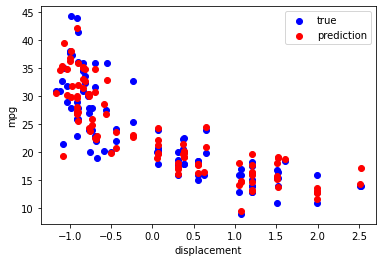

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()